# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [76]:
df = pd.read_csv('C:/Users/Zhang Yu Jie/Downloads/2023-Tutorials-main/2023-Tutorials-main/data/states_edu.csv')


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *AVG_MATH_4_SCORE*

How many years of data are logged in our dataset? 

In [77]:
df['YEAR'].unique()
print(df['YEAR'].unique())
print(df['YEAR'].nunique())

[1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 1986 1987 1988
 1989 1990 1991 2017 2019]
33


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [78]:
print(np.mean(df[df["STATE"] == 'MICHIGAN']['AVG_MATH_4_SCORE']))
a = df[df["STATE"] == 'OHIO']['AVG_MATH_4_SCORE']
a = a.dropna()

print(np.mean(a))
print('Average value for Ohio is higher' if np.mean(df[df["STATE"] == 'MICHIGAN']['AVG_MATH_4_SCORE'])<np.mean(a)
     else 'Average value for Michigan is higher')

234.36363636363637
239.45454545454547
Average value for Ohio is higher


Find the average for your outcome score across all states in 2019

In [79]:
b = df[df['YEAR'] == 2019]['AVG_MATH_4_SCORE']
print(np.mean(b))

239.9433962264151


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [80]:
st = df.groupby('STATE')
print(st['AVG_MATH_4_SCORE'].max())

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [89]:
dt = df[df['YEAR'] == 2014]
tf = dt.groupby('STATE')
print(tf)
EXPENDITURE_PER_STUDENT = (tf['STATE_REVENUE'].mean() / tf['GRADES_12_G'].mean())
print(EXPENDITURE_PER_STUDENT)

STATE
ALABAMA                  80.745599
ALASKA                  188.643677
ARIZONA                  37.477006
ARKANSAS                123.562631
CALIFORNIA               77.300215
COLORADO                 62.883430
CONNECTICUT             103.493178
DELAWARE                130.958103
DISTRICT_OF_COLUMBIA      0.000000
FLORIDA                  55.189681
GEORGIA                  73.655702
HAWAII                  221.213923
IDAHO                    66.380703
ILLINOIS                 75.639361
INDIANA                 101.828343
IOWA                     89.970214
KANSAS                   99.752895
KENTUCKY                 90.439834
LOUISIANA                85.085324
MAINE                    74.927778
MARYLAND                105.532478
MASSACHUSETTS            96.820777
MICHIGAN                 86.818791
MINNESOTA               109.220843
MISSISSIPPI              77.401587
MISSOURI                 67.316669
MONTANA                  83.744326
NEBRASKA                 55.659711
NEVADA        

Feature engineering justification: **The table shows the average expenditure of student in 2014 in different states**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<Axes: xlabel='YEAR'>

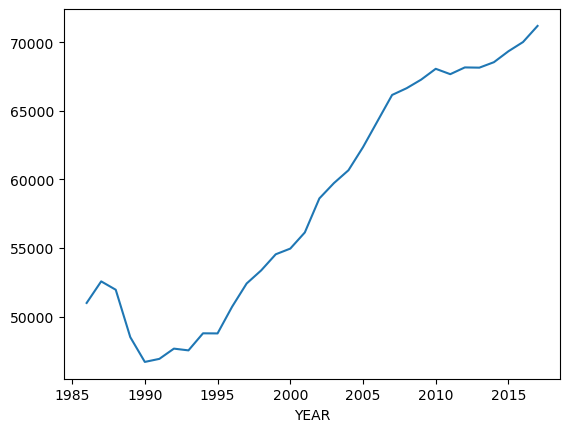

In [91]:
df.groupby('YEAR')["GRADES_12_G"].mean().plot()


**The average enrollment in 12th grade over the years**

**Visualization 2**

Text(0, 0.5, 'Number of seniors')

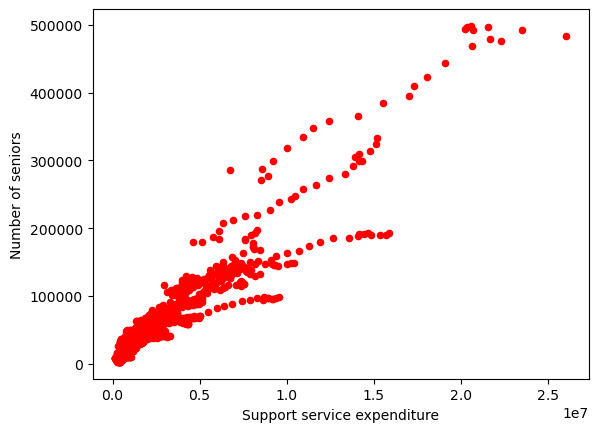

In [102]:
ax = df.plot.scatter(x = "SUPPORT_SERVICES_EXPENDITURE", y = "GRADES_12_G", c = "Red")
plt.xlabel('Support service expenditure')
plt.ylabel('Number of seniors')

**The correlation between support service expenditure and the No. of seniors in school**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [103]:
from sklearn.model_selection import train_test_split

In [123]:
X = df[['GRADES_8_G', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE']].dropna()
y = df.loc[X.index]['GRADES_4_G']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [125]:
from sklearn.linear_model import LinearRegression

In [126]:
model = LinearRegression()

In [127]:
model.fit(X_train, y_train)

LinearRegression()

In [128]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [129]:
print(model.intercept_)
print(model.coef_)

23688.517533999882
[   0.99938366   13.72849943 -126.57230368]


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

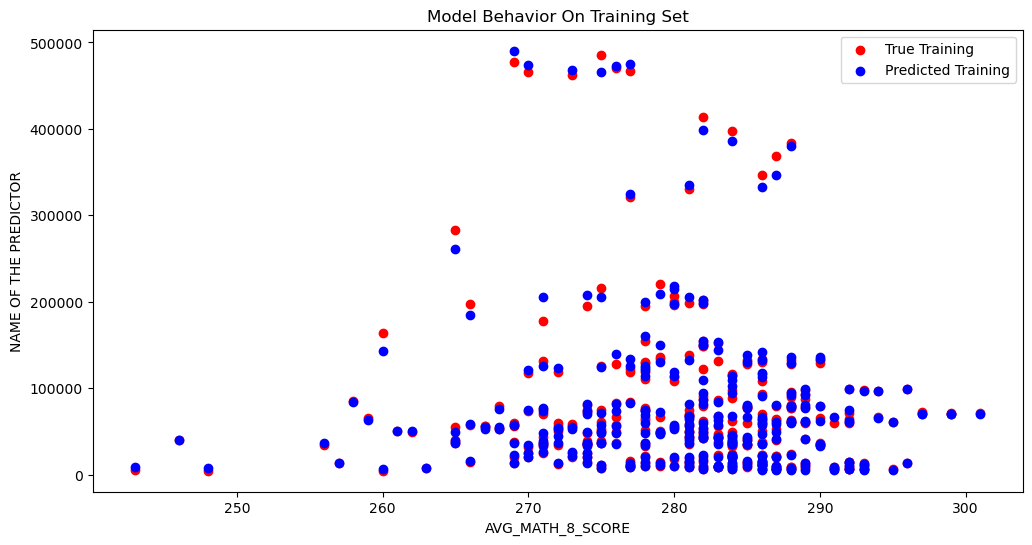

In [130]:
col_name = 'AVG_MATH_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "blue")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

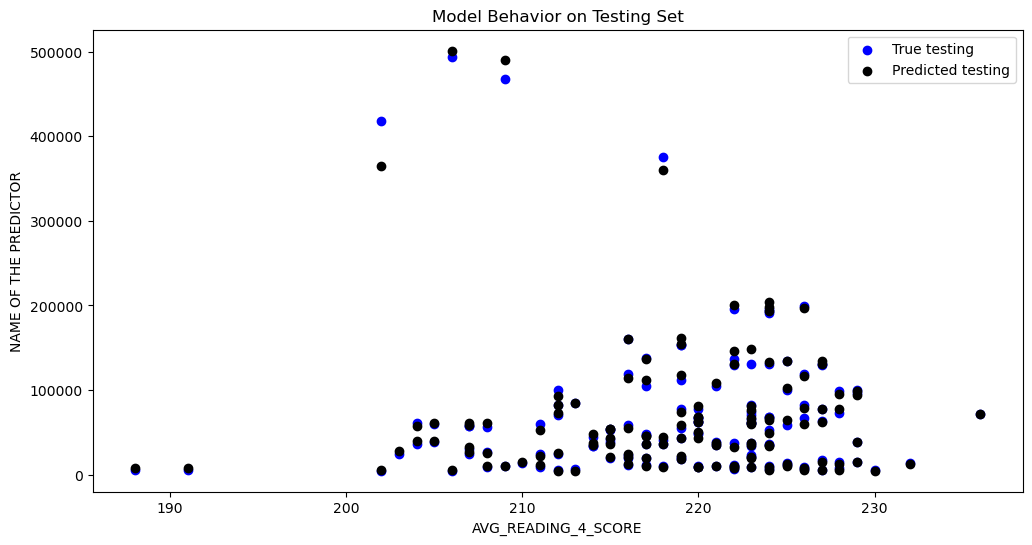

In [131]:
col_name = "AVG_READING_4_SCORE"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**The model predicts the number of 4th graders based on the average reading score**